#📌 Extração

In [1]:
import pandas as pd
import requests
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
response = requests.get(url)
data = response.json()
dados = pd.DataFrame(data)
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [4]:
dados = pd.json_normalize(data)
dados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [5]:
dados.columns = dados.columns.str.lower()
dados.columns

Index(['customerid', 'churn', 'customer.gender', 'customer.seniorcitizen',
       'customer.partner', 'customer.dependents', 'customer.tenure',
       'phone.phoneservice', 'phone.multiplelines', 'internet.internetservice',
       'internet.onlinesecurity', 'internet.onlinebackup',
       'internet.deviceprotection', 'internet.techsupport',
       'internet.streamingtv', 'internet.streamingmovies', 'account.contract',
       'account.paperlessbilling', 'account.paymentmethod',
       'account.charges.monthly', 'account.charges.total'],
      dtype='object')

In [6]:
dados = dados.rename(columns={
    'customerid': 'id_cliente',
    'churn': 'evasao',
    'customer.gender': 'genero',
    'customer.seniorcitizen': 'senioridade',
    'customer.partner': 'tem_parceiro',
    'customer.dependents': 'tem_dependentes',
    'customer.tenure': 'meses_contrato',
    'phone.phoneservice': 'tem_servico_telefone',
    'phone.multiplelines': 'multiplas_linhas_telefone',
    'internet.internetservice': 'tipo_servico_internet',
    'internet.onlinesecurity': 'seguranca_online',
    'internet.onlinebackup': 'backup_online',
    'internet.deviceprotection': 'protecao_dispositivo',
    'internet.techsupport': 'suporte_tecnico',
    'internet.streamingtv': 'streaming_tv',
    'internet.streamingmovies': 'streaming_filmes',
    'account.contract': 'tipo_contrato',
    'account.paperlessbilling': 'fatura_impressa',
    'account.paymentmethod': 'forma_pagamento',
    'account.charges.monthly': 'fatura_mensal',
    'account.charges.total': 'fatura_total',

})


dados.columns

Index(['id_cliente', 'evasao', 'genero', 'senioridade', 'tem_parceiro',
       'tem_dependentes', 'meses_contrato', 'tem_servico_telefone',
       'multiplas_linhas_telefone', 'tipo_servico_internet',
       'seguranca_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'tipo_contrato',
       'fatura_impressa', 'forma_pagamento', 'fatura_mensal', 'fatura_total'],
      dtype='object')

In [7]:
print("Quantidade de dados nulos")
dados.isnull().sum()

Quantidade de dados nulos


,0
id_cliente,0
evasao,0
genero,0
senioridade,0
tem_parceiro,0
tem_dependentes,0
meses_contrato,0
tem_servico_telefone,0
multiplas_linhas_telefone,0
tipo_servico_internet,0


In [8]:
dados['fatura_total'] = pd.to_numeric(dados['fatura_total'], errors='coerce')
media = dados['fatura_total'].mean()
dados['fatura_total'] = dados['fatura_total'].fillna(media)

In [9]:
print("Quantidade de dados duplicados")
dados.duplicated().sum()

Quantidade de dados duplicados


np.int64(0)

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 7267 non-null   object 
 1   evasao                     7267 non-null   object 
 2   genero                     7267 non-null   object 
 3   senioridade                7267 non-null   int64  
 4   tem_parceiro               7267 non-null   object 
 5   tem_dependentes            7267 non-null   object 
 6   meses_contrato             7267 non-null   int64  
 7   tem_servico_telefone       7267 non-null   object 
 8   multiplas_linhas_telefone  7267 non-null   object 
 9   tipo_servico_internet      7267 non-null   object 
 10  seguranca_online           7267 non-null   object 
 11  backup_online              7267 non-null   object 
 12  protecao_dispositivo       7267 non-null   object 
 13  suporte_tecnico            7267 non-null   objec

In [11]:
for col in dados.select_dtypes(include='object').columns:
    espacos = dados[col].apply(lambda x: isinstance(x, str) and x.strip() == "")
    if espacos.any():
        print(f"- Coluna '{col}' contém {espacos.sum()} strings vazias ou só com espaços.")

- Coluna 'evasao' contém 224 strings vazias ou só com espaços.


In [12]:
for col in dados.select_dtypes(include='object').columns:
    dados[col] = dados[col].apply(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
dados = dados.dropna()

In [13]:
dados.isnull().sum()

,0
id_cliente,0
evasao,0
genero,0
senioridade,0
tem_parceiro,0
tem_dependentes,0
meses_contrato,0
tem_servico_telefone,0
multiplas_linhas_telefone,0
tipo_servico_internet,0


In [14]:
dados['fatura_total'] = pd.to_numeric(dados['fatura_total'], errors='coerce')
print(dados['fatura_total'].dtype)

float64


In [15]:
# Calculando os gastos diários e adicionando coluna
dados['fatura_diária'] = ((dados['fatura_total'] / dados['meses_contrato']) /30 ).round(2)
dados.insert(19, 'fatura_diária', dados.pop('fatura_diária'))

In [16]:
dados.columns

Index(['id_cliente', 'evasao', 'genero', 'senioridade', 'tem_parceiro',
       'tem_dependentes', 'meses_contrato', 'tem_servico_telefone',
       'multiplas_linhas_telefone', 'tipo_servico_internet',
       'seguranca_online', 'backup_online', 'protecao_dispositivo',
       'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'tipo_contrato',
       'fatura_impressa', 'forma_pagamento', 'fatura_diária', 'fatura_mensal',
       'fatura_total'],
      dtype='object')

#📊 Carga e análise

In [ ]:
#Verificando quantos clientes cancelaram
dados['evasao'].value_counts()

,count
evasao,
No,5174
Yes,1869


In [ ]:
dados['evasao'].value_counts(normalize=True).mul(100).round(2)

,proportion
evasao,
No,73.46
Yes,26.54


In [ ]:
# Fazendo a análise descritiva
dados.describe(include=[np.number])

,senioridade,meses_contrato,fatura_diária,fatura_mensal,fatura_total
count,7043.000000,7043.000000,7043.00,7043.000000,7043.000000
mean,0.162147,32.371149,inf,64.761692,2283.296277
std,0.368612,24.559481,NaN,30.090047,2265.000260
min,0.000000,0.000000,0.46,18.250000,18.800000
25%,0.000000,9.000000,1.21,35.500000,402.225000
50%,0.000000,29.000000,2.35,70.350000,1400.550000
75%,0.000000,55.000000,3.01,89.850000,3786.600000
max,1.000000,72.000000,inf,118.750000,8684.800000


**Distribuição da Evasão**

In [17]:
evasao = dados['evasao'].value_counts()
print(evasao)

evasao_percent = dados['evasao'].value_counts(normalize='index' * 100)
print(evasao_percent.round(2))

evasao
No     5174
Yes    1869
Name: count, dtype: int64
evasao
No     0.73
Yes    0.27
Name: proportion, dtype: float64


In [18]:
import plotly.graph_objects as go

colors = {
    'Yes': '#34699A',  # Azul
    'No': '#D25D5D'   # Rosa
}
contagem = dados['evasao'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=contagem.index,
    values=contagem.values,
    hole=0.5,
    marker=dict(colors=[colors.get(k) for k in contagem.index])
)])

fig.update_layout(
    title='Distribuição de Clientes que Evadiram vs. Permaneceram'
)

fig.show()


**Contagem de Evasão por Variáveis Categóricas**


In [19]:
genero = pd.crosstab(dados['genero'], dados['evasao'], normalize='index') * 100
print(genero.round(2))

evasao     No    Yes
genero              
Female  73.08  26.92
Male    73.84  26.16


In [20]:
dados['genero'].value_counts(normalize=True).mul(100).round(2)

,proportion
genero,
Male,50.48
Female,49.52


In [21]:
colors = {
    'Yes': '#34699A',  # Azul
    'No': '#D25D5D'   # Rosa
}

px.histogram(dados, x = 'genero', text_auto = True, color = 'evasao', barmode = 'group',  color_discrete_map=colors)


In [22]:
tipo_contrato_percent = pd.crosstab(dados['tipo_contrato'], dados['evasao'], normalize='index') * 100
print(tipo_contrato_percent.round(2))

evasao             No    Yes
tipo_contrato               
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


In [23]:
tipo_contrato = pd.crosstab(dados['tipo_contrato'], dados['evasao'])
print(tipo_contrato)

evasao            No   Yes
tipo_contrato             
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


<Axes: title={'center': 'Distribuição dos Clientes que Evadiram por Tipo de Contrato'}, ylabel='Yes'>

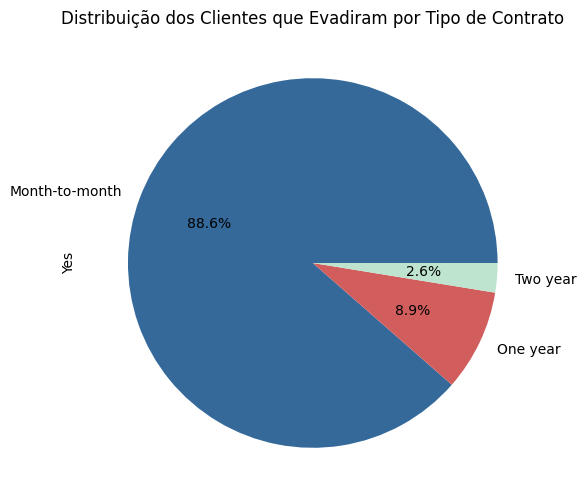

In [24]:
colors = ['#34699A','#D25D5D', '#BEE4D0', '#F3cd05', '#F18904']

tipo_contrato['Yes'].plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Distribuição dos Clientes que Evadiram por Tipo de Contrato', colors=colors)

In [25]:
forma_pagamento = pd.crosstab(dados['forma_pagamento'], dados['evasao'])
print(forma_pagamento)

evasao                       No   Yes
forma_pagamento                      
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


In [26]:
forma_pagamento_percent = pd.crosstab(dados['forma_pagamento'], dados['evasao'], normalize='index') * 100
print(forma_pagamento_percent.round(2))

evasao                        No    Yes
forma_pagamento                        
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


In [27]:
colors = {
    'Yes': '#36688d',  # Azul
    'No': '#c0334d'   # Pink
}

px.histogram(dados, x = 'forma_pagamento', text_auto = True, color = 'evasao', barmode = 'group', color_discrete_map=colors)

In [28]:
senioridade = pd.crosstab(dados['senioridade'], dados['evasao'])
print(senioridade)

evasao         No   Yes
senioridade            
0            4508  1393
1             666   476


In [29]:
senioridade_percent = pd.crosstab(dados['senioridade'], dados['evasao'], normalize='index') * 100
print(senioridade_percent.round(2))

evasao          No    Yes
senioridade              
0            76.39  23.61
1            58.32  41.68


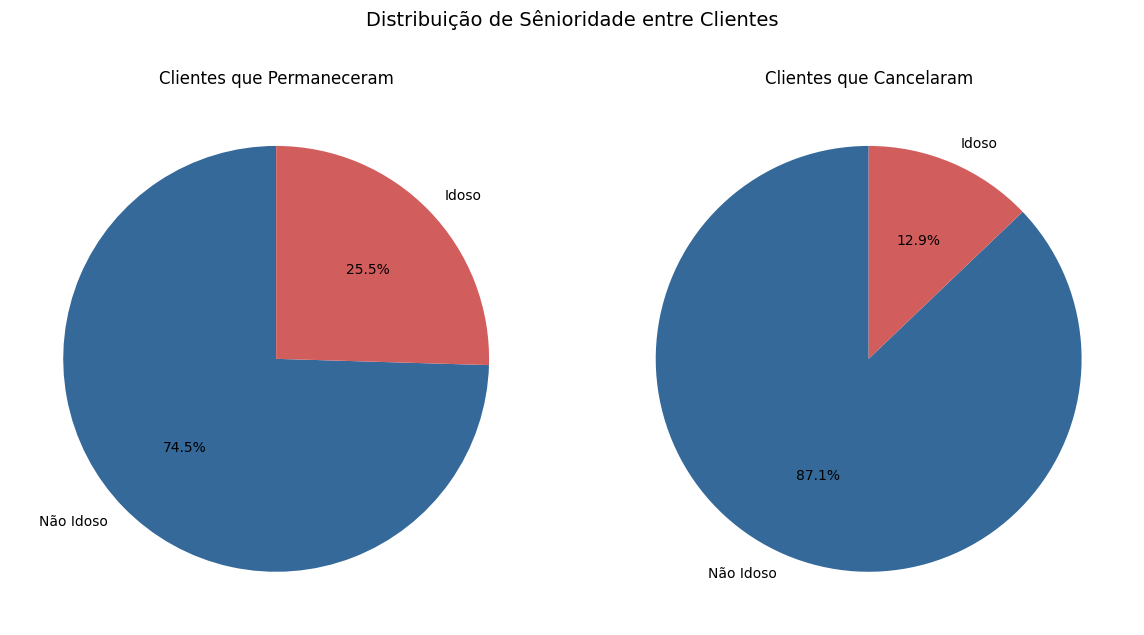

In [38]:
labels = ['Não Idoso', 'Idoso']
valores_permaneceram = senioridade['Yes']
valores_evadiu = senioridade['No']
colors= ['#34699A','#D25D5D']

fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].pie(valores_permaneceram, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('Clientes que Permaneceram')

axs[1].pie(valores_evadiu, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axs[1].set_title('Clientes que Cancelaram')

plt.suptitle('Distribuição de Sênioridade entre Clientes', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()



In [31]:
streaming_filmes = pd.crosstab(dados['streaming_filmes'], dados['evasao'])
print(streaming_filmes)

evasao                 No  Yes
streaming_filmes              
No                   1847  938
No internet service  1413  113
Yes                  1914  818


In [32]:
streaming_filmes_percent = pd.crosstab(dados['streaming_filmes'], dados['evasao'], normalize='index') * 100
print(streaming_filmes_percent.round(2))

evasao                  No    Yes
streaming_filmes                 
No                   66.32  33.68
No internet service  92.60   7.40
Yes                  70.06  29.94


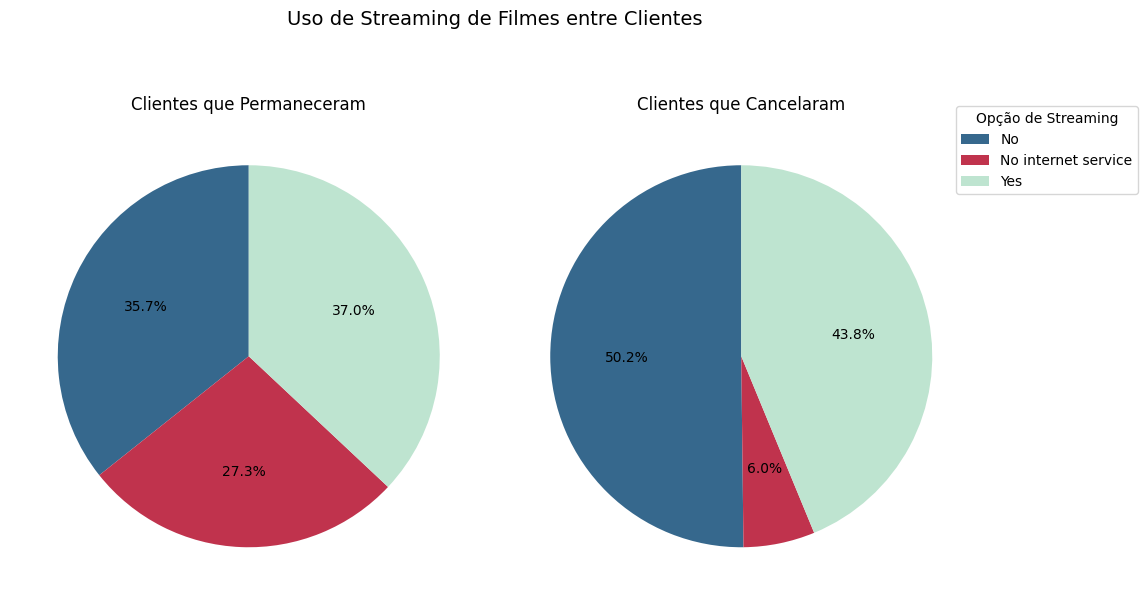

In [39]:

labels = streaming_filmes.index.astype(str)
valores_permaneceram = streaming_filmes['No']
valores_evadiu = streaming_filmes['Yes']

cores = ['#36688d', '#c0334d', '#BEE4D0']

fig, axs = plt.subplots(1, 2, figsize=(10,6))


axs[0].pie(valores_permaneceram, labels=None, autopct='%1.1f%%', startangle=90, colors=cores)
axs[0].set_title('Clientes que Permaneceram')

axs[1].pie(valores_evadiu, labels=None, autopct='%1.1f%%', startangle=90, colors=cores)
axs[1].set_title('Clientes que Cancelaram')

fig.legend(labels, loc='upper right', bbox_to_anchor=(1.15, 0.9), title="Opção de Streaming")

plt.suptitle(
    'Uso de Streaming de Filmes entre Clientes',
    fontsize=14,
    y=1.05
)

plt.tight_layout()
plt.show()



In [41]:
tem_parceiro = pd.crosstab(dados['tem_parceiro'], dados['evasao'])
print(tem_parceiro)

evasao          No   Yes
tem_parceiro            
No            2441  1200
Yes           2733   669


In [42]:
tem_parceiro_percent = pd.crosstab(dados['tem_parceiro'], dados['evasao'], normalize='index') * 100
print(tem_parceiro_percent.round(2))


evasao           No    Yes
tem_parceiro              
No            67.04  32.96
Yes           80.34  19.66


In [43]:
colors = {
    'Yes': '#34699A',  # Azul
    'No': '#D25D5D'   # Rosa
}

px.histogram(dados, x = 'tem_parceiro', text_auto = True, color = 'evasao', barmode = 'group', color_discrete_map=colors)

In [44]:
streaming_tv = pd.crosstab(dados['streaming_tv'], dados['evasao'])
print(streaming_tv)

evasao                 No  Yes
streaming_tv                  
No                   1868  942
No internet service  1413  113
Yes                  1893  814


In [45]:
streaming_tv_percent = pd.crosstab(dados['streaming_tv'], dados['evasao'], normalize='index') * 100
print(streaming_tv_percent.round(2))

evasao                  No    Yes
streaming_tv                     
No                   66.48  33.52
No internet service  92.60   7.40
Yes                  69.93  30.07


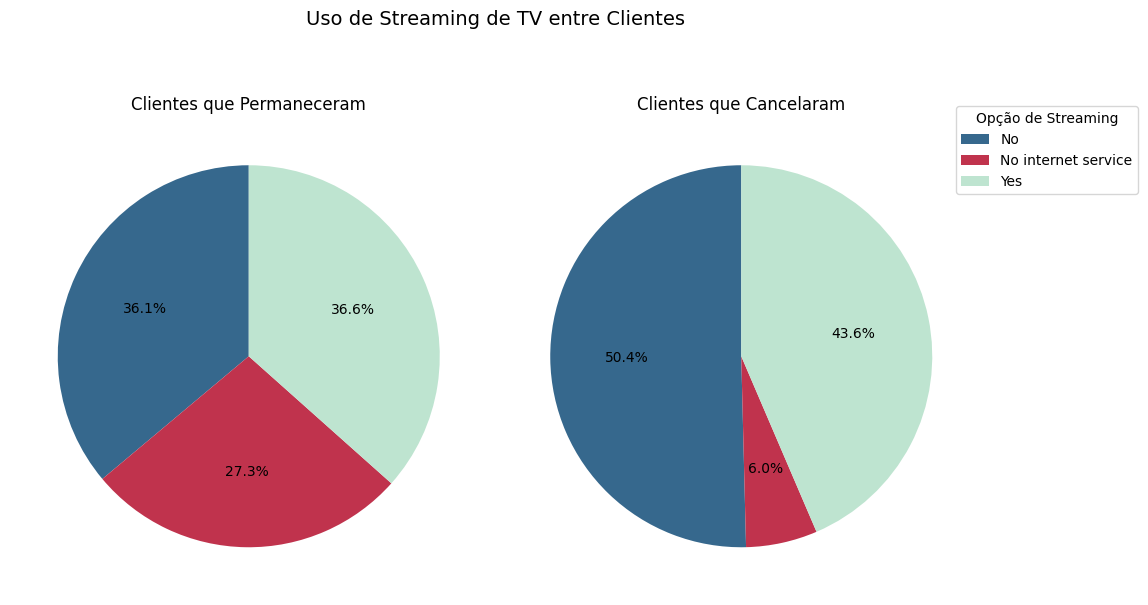

In [46]:
labels = streaming_tv.index.astype(str)
valores_permaneceram = streaming_tv['No']
valores_evadiu = streaming_tv['Yes']

cores = ['#36688d', '#c0334d', '#BEE4D0']

fig, axs = plt.subplots(1, 2, figsize=(10,6))

axs[0].pie(valores_permaneceram, labels=None, autopct='%1.1f%%', startangle=90, colors=cores)
axs[0].set_title('Clientes que Permaneceram')

axs[1].pie(valores_evadiu, labels=None, autopct='%1.1f%%', startangle=90, colors=cores)
axs[1].set_title('Clientes que Cancelaram')

fig.legend(labels, loc='upper right', bbox_to_anchor=(1.15, 0.9), title="Opção de Streaming")

plt.suptitle(
    'Uso de Streaming de TV entre Clientes',
    fontsize=14,
    y=1.05
)

plt.tight_layout()
plt.show()


In [52]:
evasao_por_fp = dados[dados['evasao'] == 'Sim'].groupby('forma_pagamento').size()
total_por_fp = dados.groupby('forma_pagamento').size()
percentual_evasao = (evasao_por_fp / total_por_fp * 100)


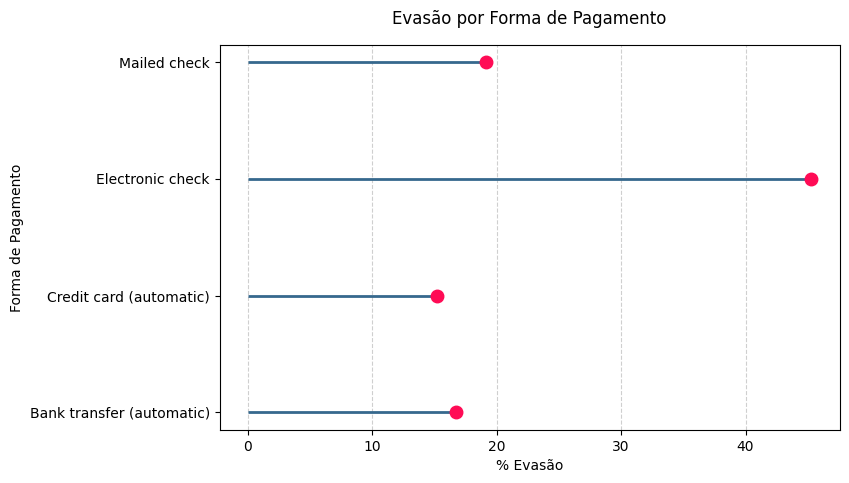

In [53]:

dados_resumo = dados.groupby('forma_pagamento')['evasao'].value_counts(normalize=True).unstack().fillna(0) * 100
categorias = dados_resumo.index
valores = dados_resumo['Yes']

fig, ax = plt.subplots(figsize=(8, 5))

ax.hlines(y=categorias, xmin=0, xmax=valores, color='#36688d', linewidth=2)
ax.plot(valores, categorias, "o", markersize=9, color='#FF0B55')

ax.set_xlabel('% Evasão')
ax.set_ylabel('Forma de Pagamento')
ax.set_title('Evasão por Forma de Pagamento', pad=15)
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()


 **Contagem de Evasão por Variáveis Numéricas**


In [54]:
dados.groupby('evasao')['meses_contrato'].describe()


,count,mean,std,min,25%,50%,75%,max
evasao,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


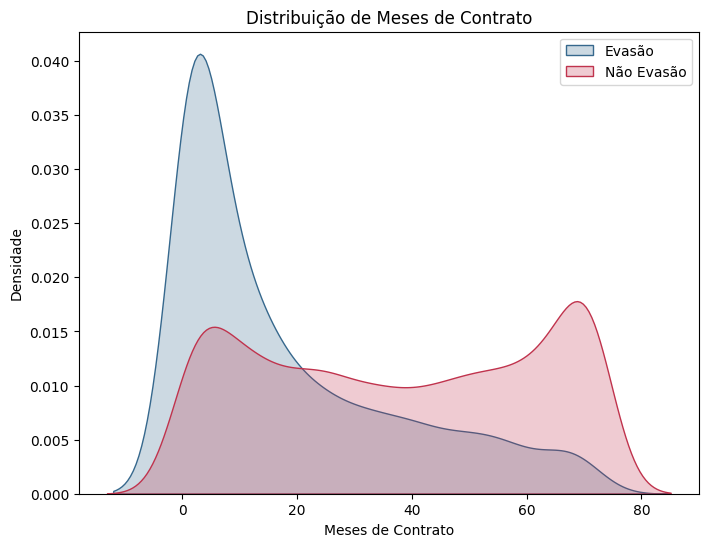

In [56]:
plt.figure(figsize=(8, 6))
sns.kdeplot(dados[dados.evasao == 'Yes'].meses_contrato, label='Evasão', fill=True, color='#36688d')
sns.kdeplot(dados[dados.evasao == 'No'].meses_contrato, label='Não Evasão', fill=True, color='#c0334d')
plt.title('Distribuição de Meses de Contrato')
plt.xlabel('Meses de Contrato')
plt.ylabel('Densidade')

plt.legend()

In [57]:
dados.groupby('evasao')['fatura_diária'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao,,,,,,,,
No,5174.0,inf,NaN,0.46,0.85,2.14,2.93,inf
Yes,1869.0,2.481006,0.832083,0.47,1.93,2.64,3.13,4.05


In [58]:
# Tratando valores inf na coluna fatura_diária
dados['fatura_diária'] = dados['fatura_diária'].replace([np.inf, -np.inf], np.nan)
dados['fatura_diária'] = dados['fatura_diária'].fillna(0)


In [59]:
dados.groupby('evasao')['fatura_diária'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao,,,,,,,,
No,5174.0,2.039287,1.041261,0.00,0.84,2.13,2.92,4.02
Yes,1869.0,2.481006,0.832083,0.47,1.93,2.64,3.13,4.05


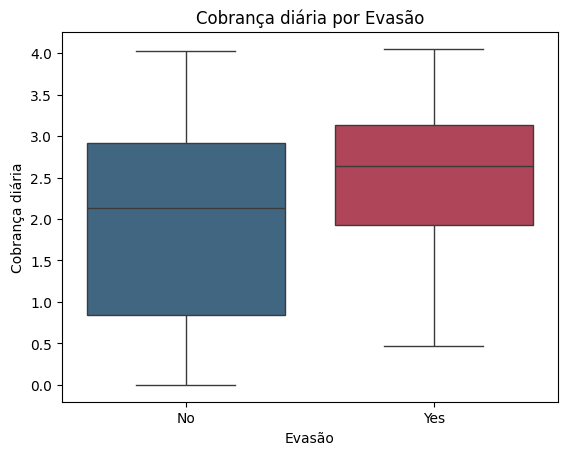

In [60]:
sns.boxplot(x='evasao', y='fatura_diária', data=dados, hue='evasao', palette=['#36688d', '#c0334d'], legend=False)
plt.title('Cobrança diária por Evasão')
plt.xlabel('Evasão')
plt.ylabel('Cobrança diária')
plt.show()

In [61]:
dados.groupby('evasao')['fatura_mensal'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


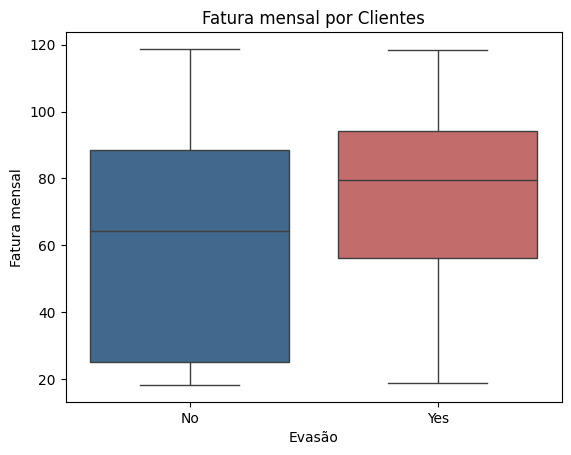

In [63]:
sns.boxplot(x='evasao', y='fatura_mensal', data=dados, hue='evasao', palette=['#34699A', '#D25D5D'], legend=False)
plt.title('Fatura mensal por Clientes')
plt.xlabel('Evasão')
plt.ylabel('Fatura mensal')
plt.show()


In [64]:
dados.groupby('evasao')['fatura_total'].describe()

,count,mean,std,min,25%,50%,75%,max
evasao,,,,,,,,
No,5174.0,2554.760104,2327.013364,18.80,579.575,1689.175,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.500,703.550,2331.30,8684.80


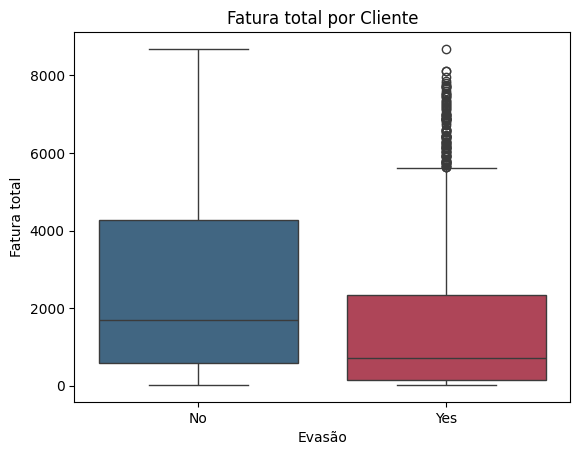

In [66]:
sns.boxplot(x='evasao', y='fatura_total', data=dados, hue='evasao', palette=['#36688d', '#c0334d'])
plt.title('Fatura total por Cliente')
plt.xlabel('Evasão')
plt.ylabel('Fatura total')
plt.show()

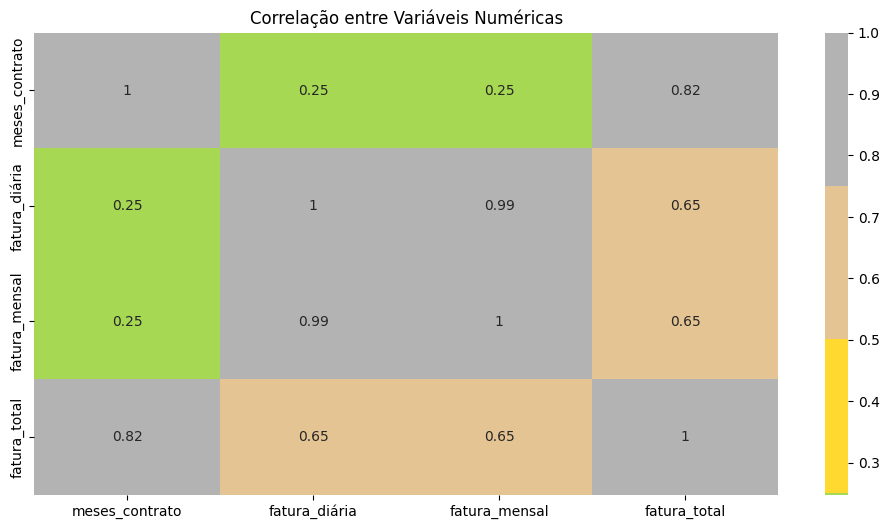

In [67]:
colunas_numericas = dados.select_dtypes(include=[np.number]).columns
colunas_numericas = colunas_numericas.drop('senioridade')
plt.figure(figsize=(12, 6))
sns.heatmap(dados[colunas_numericas].corr(), annot=True, cmap='Set2', center=0)
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

#📄Relatorio Final

# <font color=magenta>Introdução</font>

Neste relatório, vamos apresentar os principais achados da análise de evasão de clientes da Telecom X, parte do projeto "Churn de Clientes". A empresa está enfrentando um número alto de cancelamentos e quer entender melhor por que isso está acontecendo.

Como analista de dados, o meu papel aqui foi coletar, organizar e analisar os dados para descobrir padrões e comportamentos que possam explicar essa saída de clientes. Usamos Python e suas bibliotecas para explorar os dados, criar gráficos e destacar os pontos mais importantes.

Essas informações vão ajudar a equipe de Data Science a avançar com modelos preditivos e pensar em estratégias práticas para reduzir a evasão e melhorar a relação com os clientes.

# <font color=magenta>Tratamento de Dados (ETL)</font>

A etapa de ETL - Extração, Transformação e Carga – tem como objetivo preparar os dados para análise, garantindo que estejam organizados, limpos e prontos para gerar insights confiáveis.

Nesse processo, os dados passaram por uma normalização, o que permitiu visualizar com clareza as informações contidas em cada coluna. Em seguida, foram identificados e removidos valores nulos, vazios e duplicados, a fim de evitar distorções nas análises.

As colunas foram renomeadas com termos em português e padronizadas em letras minúsculas, facilitando a leitura e a compreensão das variáveis ao longo do projeto.

Com os dados tratados, o conjunto tornou-se mais consistente e adequado para a etapa de análise exploratória.

# <font color=magenta>**1.** Análise Exploratória Inicial</font>

A análise inicial dos dados indica que 26,54% dos clientes (1.869) cancelaram o serviço.

# <font color=magenta>**2.** Perfil do Cliente</font>

- Gênero: diferença pouco significativa — 26,92% mulheres vs. 26,16% homens.

- Tipo de contrato: predominância do modelo Month-to-Month (57,29% dos clientes), que também concentra a maior taxa de evasão (42,71%).

- Forma de pagamento: 45,29% dos cancelamentos utilizavam cheque eletrônico.

- Sênioridade: 58,32% dos clientes que cancelaram não são idosos (41,68% são idosos).

- Serviços de streaming: 29,94% usavam streaming de filmes e 30,07% usavam streaming de TV.

- Relacionamento: 32,96% dos cancelamentos não possuíam parceiro(a).


# <font color=magenta>**3.** Análise Financeira</font>

- Tempo de contrato médio: Cancelaram: 17 meses (1 ano e 5 meses) | Permaneceram: 37 meses (3 anos)

- Cobrança diária média: Cancelaram: R$2,48 | Permaneceram: R$ 2,04

- Cobrança mensal média: Cancelaram: R$ 74,45 | Permaneceram: R$ 61,27

- Cobrança total média: Cancelaram: R$ 1.531,80 | Permaneceram: R$ 2.554,77

# <font color=magenta>**4.** Síntese do Perfil de Evasão</font>

O cliente com maior probabilidade de cancelamento apresenta o seguinte perfil:

- Contrato Month-to-Month.

- Pagamento via cheque eletrônico.

- Não idoso.

- Sem parceiro(a).

- Usuário de streaming de filmes ou TV.

- Permanece, em média, 17 meses antes de cancelar.

- Apresenta cobrança mensal um pouco maior que a de clientes fiéis.